In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
# Download data

In [0]:
untar_data?

In [6]:
path = untar_data(URLs.IMAGEWOOF_320)

In [7]:
path.ls()

[PosixPath('/root/.fastai/data/imagewoof2-320/val'),
 PosixPath('/root/.fastai/data/imagewoof2-320/train')]

In [0]:
# Read data into dataloader

In [0]:
bs = 64

data = (ImageList.from_folder(path) 
        .split_by_folder(train='train', valid='val')             
        .label_from_folder()
        .transform(size = 320)
        .databunch(bs=bs)
        .normalize()) 

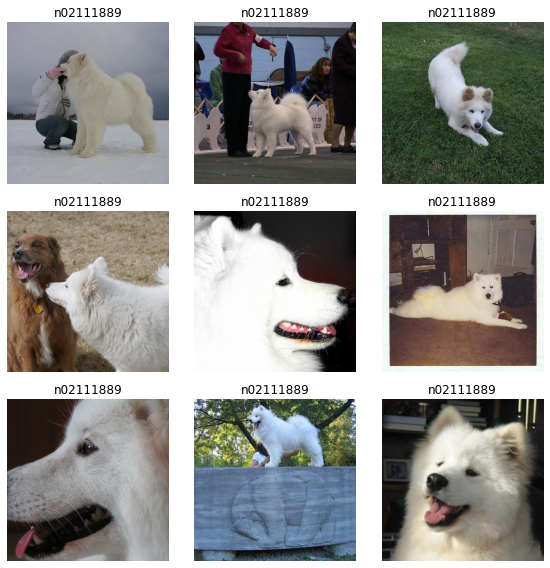

In [10]:
data.show_batch(3, 3, figsize=(8,8))

In [11]:
data.classes

['n02086240',
 'n02087394',
 'n02088364',
 'n02089973',
 'n02093754',
 'n02096294',
 'n02099601',
 'n02105641',
 'n02111889',
 'n02115641']

In [0]:
x,y = data.train_ds[0]

In [13]:
x.size

torch.Size([320, 320])

In [0]:
# Create Model

In [0]:
def conv(ni,nf): return nn.Conv2d(ni, nf, kernel_size=3, stride=2, padding=1)

In [0]:
model = nn.Sequential(
    conv(3, 8), # 14
    nn.BatchNorm2d(8),
    nn.ReLU(),
    conv(8, 16), # 7
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, 32), # 4
    nn.BatchNorm2d(32),
    nn.ReLU(),
    conv(32, 64), # 2
    nn.BatchNorm2d(64),
    nn.ReLU(),
    conv(64, 128), # 2
    nn.BatchNorm2d(128),
    nn.ReLU(),
    conv(128, 64), # 2
    nn.BatchNorm2d(64),
    nn.ReLU(),
    conv(64, 32), # 2
    nn.BatchNorm2d(32),
    nn.ReLU(),
    conv(32, 16), # 2
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, 10), # 1
    nn.BatchNorm2d(10),
    Flatten()     # remove (1,1) grid
)

In [0]:
# Create Learner

In [0]:
learn = Learner(data, model=model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

In [44]:
print(learn.summary())

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 160, 160]        224        True      
______________________________________________________________________
BatchNorm2d          [8, 160, 160]        16         True      
______________________________________________________________________
ReLU                 [8, 160, 160]        0          False     
______________________________________________________________________
Conv2d               [16, 80, 80]         1,168      True      
______________________________________________________________________
BatchNorm2d          [16, 80, 80]         32         True      
______________________________________________________________________
ReLU                 [16, 80, 80]         0          False     
______________________________________________________________________
Conv2d               [32, 40, 40]         4,640      True      
___________________________________________________

In [48]:
learn.lr_find(end_lr=100)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


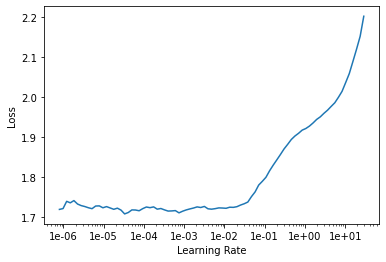

In [49]:
learn.recorder.plot()

In [50]:
learn.fit_one_cycle(3, max_lr=3e-4)

epoch,train_loss,valid_loss,accuracy,time
0,1.697255,1.763314,0.385594,00:54
1,1.667579,1.730325,0.388139,00:50
2,1.618870,1.721107,0.392466,00:50


In [0]:
# Chance is higher than the random 10%
# Model is learning
# Fin